# Import Libraries ⬇

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading the dataset 📊

In [108]:
!file -i /content/newsfeed.csv

/content/newsfeed.csv: text/csv; charset=utf-8


In [109]:
df = pd.read_csv('/content/newsfeed.csv', encoding='utf-8')
df.sample(10)

,Body,category
2096,الشرق اوسط البشير هدد طرد مراقب انتخاب اجانب ا...,1
1172,الشرق اوسط قياد حماس دمشق بحث صفق شاليط قياده ...,1
3401,العالم طاءر طيار قتل اكستان طاءره طيار شتبه ان...,2
3519,اقتصاد اعمال خط نابيب غاز مر عبر ركي اتحاد اور...,3
1417,الشرق اوسط المعارضه الايرانيه صدام امن متظاهر ...,1
3932,رياضه البريطاني جنس اتون فوز سباق استرالي فورم...,5
2880,العالم اوبام امر تنفيذ سياس جديد افغانستان الر...,2
96,الشرق اوسط تفاءل دول امكان حل قض غجر واسراءيل ...,1
773,الشرق اوسط مقتل شخاص نفجار ستهدف مجلس عزاء عرا...,1
172,الشرق اوسط رفسنجاني دعو طلاق سراح متظاهر المسج...,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      4250 non-null   object
 1   category  4250 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.5+ KB


<Axes: ylabel='count'>

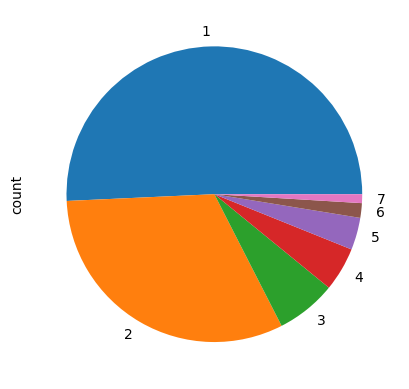

In [111]:
df['category'].value_counts().plot(kind='pie')

# Generate the Embeddings 🚩

In [112]:
corpus = []
for i in range(0, len(df)):
    review = df['Body'][i]
    corpus.append(review)

In [113]:
len(corpus)

4250

In [114]:
### Vocabulary size
voc_size=1000

In [115]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [116]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=None) # this will ensure that all the senetences have the same list shape
print(embedded_docs)

[[  0   0   0 ... 900 727 578]
 [  0   0   0 ... 198 174  12]
 [  0   0   0 ...   4 351 251]
 ...
 [  0   0   0 ...   4 891 942]
 [  0   0   0 ... 883  21 805]
 [  0   0   0 ... 854 807 196]]


In [117]:
sequence_lengths = [len(seq) for seq in onehot_repr]

# Find the maximum sequence length
maxlen = np.max(sequence_lengths)
print("Maximum sequence length:", maxlen) # we will use this as an input_length of our Embedding Layer

Maximum sequence length: 3090


# Modeling (Training & Testing) 🏃

In [118]:
embedding_vector_features = 1000
input_length = maxlen  # Sequence length
num_classes = 8  # the number of classes you have

# Creating the model
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=input_length))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3090, 1000)        1000000   
                                                                 
 lstm_6 (LSTM)               (None, 3090, 128)         578048    
                                                                 
 dropout_6 (Dropout)         (None, 3090, 128)         0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 1710664 (6.53 MB)
Trainable params: 1710

In [120]:
print(f"the shape of the embedded docs is :  {len(embedded_docs)}")

the shape of the embedded docs is :  4250


In [121]:
df['category'].shape

(4250,)

In [122]:
import numpy as np
X=np.array(embedded_docs)
y=np.array(df['category'])

In [123]:
X

array([[  0,   0,   0, ..., 900, 727, 578],
       [  0,   0,   0, ..., 198, 174,  12],
       [  0,   0,   0, ...,   4, 351, 251],
       ...,
       [  0,   0,   0, ...,   4, 891, 942],
       [  0,   0,   0, ..., 883,  21, 805],
       [  0,   0,   0, ..., 854, 807, 196]], dtype=int32)

In [124]:
y

array([1, 1, 1, ..., 6, 6, 6])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training, 20% testing

In [126]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (3400, 3090)
Shape of y_train: (3400,)
Shape of X_test: (850, 3090)
Shape of y_test: (850,)


In [127]:
max_value = y_train.max()
max_value

7

In [128]:
y_train = to_categorical(y_train, max_value+1)
y_test = to_categorical(y_test, max_value+1)

In [129]:
epochs=25
batch_size=64
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/25
54/54 [==============================] - 28s 427ms/step - loss: 1.3207 - accuracy: 0.5132 - val_loss: 1.0831 - val_accuracy: 0.5894
Epoch 2/25
54/54 [==============================] - 22s 417ms/step - loss: 0.9191 - accuracy: 0.6965 - val_loss: 0.8908 - val_accuracy: 0.7094
Epoch 3/25
54/54 [==============================] - 23s 422ms/step - loss: 0.7786 - accuracy: 0.7694 - val_loss: 1.0692 - val_accuracy: 0.6741
Epoch 4/25
54/54 [==============================] - 23s 429ms/step - loss: 0.7403 - accuracy: 0.7712 - val_loss: 0.9298 - val_accuracy: 0.7282
Epoch 5/25
54/54 [==============================] - 23s 436ms/step - loss: 0.6614 - accuracy: 0.7924 - val_loss: 1.0332 - val_accuracy: 0.6471
Epoch 6/25
54/54 [==============================] - 23s 435ms/step - loss: 0.6329 - accuracy: 0.7835 - val_loss: 0.8529 - val_accuracy: 0.7471
Epoch 7/25
54/54 [==============================] - 24s 442ms/step - loss: 0.8229 - accuracy: 0.6903 - val_loss: 0.9267 - val_accuracy: 0.6835

# Evaluation of the Model 🩺

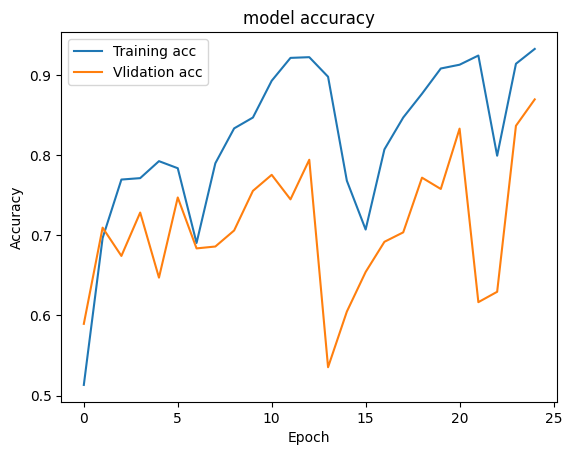

In [130]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'],label='Vlidation acc')
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

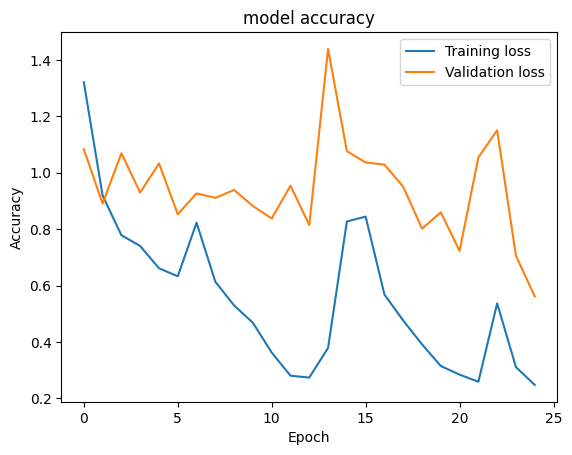

In [131]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [132]:
# Make predictions on the test data
predictions_prob = model.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)

27/27 [==============================] - 4s 108ms/step


In [133]:
true_labels = np.argmax(y_test, axis=1)

In [134]:
# Generate the classification report
report = classification_report(true_labels, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       429
           2       0.79      0.93      0.85       260
           3       0.78      0.60      0.68        58
           4       0.52      0.25      0.34        52
           5       0.96      0.73      0.83        33
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         5

    accuracy                           0.87       850
   macro avg       0.58      0.50      0.53       850
weighted avg       0.86      0.87      0.86       850



In [135]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

In [136]:
class_names = ['Middle East News', 'World News', 'Business and Economy', 'Sports', 'Press Review', 'Science and Technology', 'Miscellaneous']

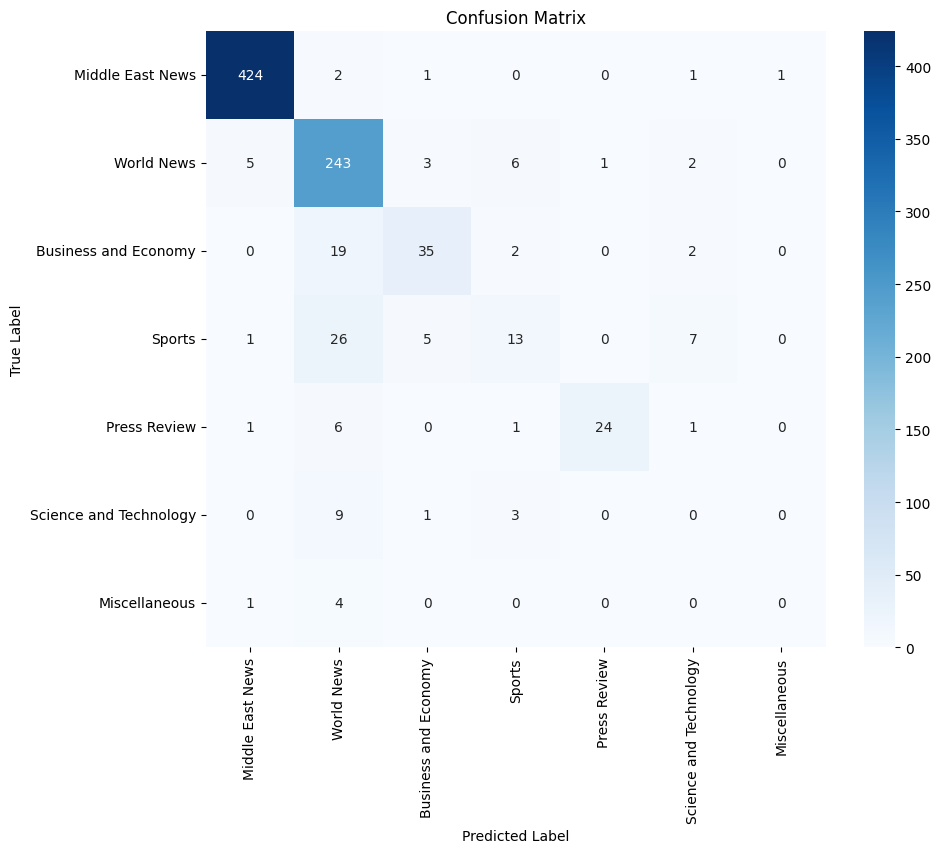

In [137]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()